# Build Unsupervised Learning Models using Python: Clustering {Hierarchical | K-Means}
---

## PROJECT CONTENTS:

1. Project Information
2. Description of Data
3. Data Sampling
4. Project Objectives | Problem Statements
5. Analysis of Data
6. Observations | Findings
7. Managerial Insights | Recommendations

---

## 1. Project Information
* Title: Data Exploration with Python using Pandas & Numpy Libraries
* Students : **Shefali Dhingra (055043) , Ashish Michael Chauhan (055007)**
* Group Number:

---

## 2. Description of Data

- Data Source: [Dataset link]("https://drive.google.com/file/d/1vF0tDlasSDjl-3eKy7YCKxeSV_-te7zu/view?usp=sharing")

### Data Columns Description:

1. Transaction_ID: Unique identifier for each trade transaction.
2. Country: Country of origin or destination for the trade.
3. Product: Product being traded.
4. Import_Export: Indicates whether the transaction is an import or export.
5. Quantity: Amount of the product traded.
6. Value: Monetary value of the product in USD.
7. Date: Date of the transaction.
8. Category: Category of the product (e.g., Electronics, Clothing, Machinery).
9. Port: Port of entry or departure.
10. Customs_Code: Customs or HS code for product classification.
11. Weight: Weight of the product in kilograms.
12. Shipping_Method: Method used for shipping (e.g., Air, Sea, Land).
13. Supplier: Name of the supplier or manufacturer.
14. Customer: Name of the customer or recipient.
15. Invoice_Number: Unique invoice number for the transaction.
16. Payment_Terms: Terms of payment (e.g., Net 30, Net 60, Cash on Delivery).

Data Type: Since the dataset contains multiple entities (countries) and records data over time, this is an example of **Panel Data** (also called longitudinal data)

### Data Variables
As observed, the dataset contains:
1. **All** non-null Variables
2. Numbers:
    1. Interger Variables: **3**  (*Quantity, Customs_Code, Invoice_Number*)
    2. Float (Decimal) Variables: **2**  (*Value, Weight*)
3. Text: **9**  (*Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customer, Payment_Terms*)
4. DateTime: **1** (*Date*)

---

## 3. Data Sampling

From the Dataset containing 15,000 values, a sample of 5001 entries was taken. The dataset sample (now refered as my_sample) was taken into account for further exploration. To match with the project objectives, a new column was added to the sample dataset called **Total Value** which represented the product of value of the product and it's quantity Imported/Exported.

### Data Variables [Category I]
My_sample dataset consists of follwing Nominal, Ordinal and Non-Categorical Data as follows:
1. Index_variables are 'Transaction_ID' and 'Invoice_Number'
2. Categorical Variables:
    - Nominal_Variables are Country, Product, Import_Export, Category, Port, Shipping_Method, Supplier, Customs_Code and Customer
    - Ordinal_variable is Payment_Terms
3. Non_Categorical_Variables are Quantity, Value and Weight

---

### About the Dataset

This dataset provides detailed information on international trade transactions, capturing both import and export activities. It includes comprehensive data on various aspects of trade, making it a valuable resource for business analysis, economic research, and financial modeling.
The Dataset used in this project is a stored in a google drive which can be viewed by anyone.

Data Format: The dataset is provided in CSV format, making it easy to load into data analysis tools and frameworks.

Additional Notes:
The dataset consists of 15,000 rows and the sample taken consits of 5001 rows, ensuring a substantial sample size for meaningful analysis.
Data is generated with realistic variability, simulating actual trade transactions.

## 4. Project Objectives

Pefrorm Unsupervised Machine Learning, Segmentation of Dataset using Unsupervised Machine Learning Clustering Algorithms, Identification of appropriate number of Segments or Clusters and Determination of Segment or Cluster Characteristics

---

## 5. Exploratory Data Analysis

Primarily the data was split into Categorical and Non-Categorical variables for Analysis. The analysis carried forward was as follows:
- Non-Categorical Variables:
    1. Measures of Central Tendency {Minimum | Maximum | Mean | Median | Mode | Percentile
    2. Measures of Dispersion {Range | Standard Deviation | Skewness | Kurtosis | Correlation (Matrix) }
    3. Composite Measure {Coefficient of Variation | Confidence Interval}
    
- Categorical Variables:
    
    1. Count | Frequency | Proportion | Minimum | Maximum | Mode | Rank
        

---

# Clustering: (K-means)

## SS Score

"The clustering analysis was evaluated using the Silhouette Score for K=2 to K=6. The results indicate that the optimal number of clusters is K=2, achieving the highest Silhouette Score of 0.7713, suggesting that the data naturally divides into two distinct groups. While K=3 provides a slightly lower score of 0.7066, it still represents well-defined clusters and could be considered for more granular segmentation. Clustering with K=4 or more resulted in lower scores (<0.65), indicating overlapping or poorly defined clusters. Based on this analysis, we recommend using K=2 as the primary clustering solution, with K=3 as an alternative depending on the business context.

## DB Score

The Davies-Bouldin Score (DB) was used to evaluate clustering quality for K=2 to K=6. The analysis shows that the lowest DB Score of 0.3616 was achieved for K=2, indicating the best clustering quality with compact and well-separated clusters. For K=3, the DB Score increases slightly to 0.4353, suggesting slightly lower-quality clusters but still acceptable for more detailed segmentation. For K=4 and higher, the DB Score exceeds 0.5, indicating that clustering quality declines as the clusters become less distinct and compact. Based on these results, K=2 is recommended as the optimal clustering solution, with K=3 as a potential alternative if finer segmentation is required.

**Hence we would be proceeding with K-Means Clusturing and k=2 clusters for the project as it has best model run statistics**

## Project Information

In [106]:
# Import Relevant Python Libraries

import io
import requests
import pandas as pd
import statsmodels.formula.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, kstest, anderson, jarque_bera
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, Birch
from scipy.cluster.hierarchy import dendrogram, linkage

import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer, KNNImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
import scipy.cluster.hierarchy as sch  # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus  # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore  # For Clustering Model Evaluation
import statsmodels.api as sm
from sklearn import metrics
import scipy.stats as stats
import statsmodels.stats.multicomp as multi
import warnings
warnings.filterwarnings('ignore')

In [91]:
#Read the Data file from Google Drive

sd43_file_id = '1N8qXKp_1JzIQJnG_z9AyqtyrlwYKq1kJkuaoq8lfw0s'
sd43_url = f'https://docs.google.com/spreadsheets/d/{sd43_file_id}/export?format=csv'

sd43_df = pd.read_csv(sd43_url)

In [ ]:
#Adding a total Value Variable

sd43_df['Total_Value'] = round(sd43_df['Value']*sd43_df['Quantity'],0)
sd43_df.head(3)

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms,Total_Value
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Colombia,describe,Export,1979,9506.57,07-12-2023,Machinery,Robertbury,620537,4248.65,Air,"Garrison, Hubbard and Hendricks",Seth Hall,21000294,Cash on Delivery,18813502.0
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Chile,president,Export,5763,7100.91,04-04-2023,Clothing,Shahport,927600,4340.81,Air,Webb-Mack,Kimberly Ryan,88738432,Prepaid,40922544.0
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Turkey,far,Import,5740,2450.34,21-08-2024,Electronics,South Joshuatown,299258,4538.41,Air,"Mendez, Jones and Johnson",Ryan Silva,89922099,Prepaid,14064952.0


In [ ]:
# Data Dimensions
print("The dimensions of the data is: ",sd43_df.shape)

The dimensions of the data is:  (15000, 17)


In [ ]:
# Data Variable Type
sd43_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
 16  Total_Value      15000 non-null  float64
dtypes: float64(3

In [ ]:
# Columns in the dataset

sd43_variables=list(sd43_df.columns)
print("The Variables are:", sd43_variables)

The Variables are: ['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity', 'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight', 'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number', 'Payment_Terms', 'Total_Value']


In [ ]:
# Bifurcating the Variables into Index, Categorical (Nominal, Ordinal) and Non-Categorical Variables

sd43_index_vars=['Transaction_ID','Invoice_Number']
sd43_nominal_vars=[ 'Country','Product','Import_Export','Category','Port','Shipping_Method','Supplier','Customer','Customs_Code']
sd43_ordinal_vars=['Payment_Terms']

sd43_cat_vars=sd43_nominal_vars+sd43_ordinal_vars
sd43_non_cat_vars=['Quantity','Value','Weight','Total_Value']

In [ ]:
# Data Types

print("Data Types:")
print(sd43_df.dtypes)

Data Types:
Transaction_ID      object
Country             object
Product             object
Import_Export       object
Quantity             int64
Value              float64
Date                object
Category            object
Port                object
Customs_Code         int64
Weight             float64
Shipping_Method     object
Supplier            object
Customer            object
Invoice_Number       int64
Payment_Terms       object
Total_Value        float64
dtype: object


## Data Sampling

In [ ]:
# A Unique Sample of 5001 Records
sd43_sample = pd.DataFrame.sample(sd43_df, n=5001, random_state=743 ,ignore_index=False)

In [ ]:
# Displaying the Dimensions of Sample Data.
sd43_sample.shape

(5001, 17)

## Data Preprocessing

In [ ]:
sd43_sample.info()

In [ ]:
# Check for missing values

sd43_sample.isnull().sum(axis=1)

### This shows that our code has no missing data, hence we would be skipping the missing data treatment

In [ ]:
# Encoding

sd43_oe = OrdinalEncoder()
sd43_categorical_cols = sd43_sample[sd43_cat_vars]
sd43_oe_fit = sd43_oe.fit_transform(sd43_categorical_cols)
sd43_encoded = pd.DataFrame(sd43_oe_fit, columns=sd43_cat_vars)
sd43_encoded.head()

In [ ]:
#Scaling

sd43_scaler = MinMaxScaler()
sd43_scaled_data = sd43_scaler.fit_transform(sd43_sample[sd43_non_cat_vars])
sd43_scaled = pd.DataFrame(sd43_scaled_data, columns=sd43_non_cat_vars)
sd43_scaled.head()

In [ ]:
# The pre-processed Dataset

sd43_processed = pd.concat([sd43_scaled, sd43_encoded], axis=1)
sd43_processed.head()

sd43_sample = sd43_processed
sd43_sample.head()

---

## Descriptive Statistics

### Non-Categorical Variables

In [ ]:
sd43_sample[sd43_non_cat_vars].describe()

,Quantity,Value,Weight,Total_Value
count,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,4974.840232,5032.805389,2495.054789,2.500240e+07
std,2845.609582,2851.846048,1462.100476,2.149208e+07
min,1.000000,103.290000,0.570000,3.864000e+03
25%,2488.000000,2585.190000,1232.540000,7.249653e+06
50%,4983.000000,5042.260000,2485.940000,1.893216e+07
75%,7369.000000,7532.980000,3784.430000,3.815871e+07
max,9996.000000,9999.130000,4998.010000,9.766350e+07


**Observation:**

1. Symmetry: Both Quantity and Value show a relatively symmetric distribution, with their mean and median being close.
2. Variability: There is considerable variability in all three variables, as indicated by the standard deviations and the range between minimum and maximum values.
3. Skewness: Although not directly visible, given that the minimum values are much lower and the maximum values are quite high, these variables could be slightly positively skewed, with a few higher values pulling the mean above the median.

In [ ]:
def summarize_numerical(my_sample, variables):
    summary = {}

    for col in variables:
        if col in sd43_sample[sd43_non_cat_vars]:  # Check if the column exists in the DataFrame
            summary[col] = {
                'Mode': my_sample[col].mode()[0],
                'Range': my_sample[col].max() - my_sample[col].min(),
                'Skewness': my_sample[col].skew() ,
                'Kurtosis': my_sample[col].kurtosis()
            }
    return summary

In [ ]:
summary_stats = summarize_numerical(sd43_sample,sd43_non_cat_vars)
summary_df = pd.DataFrame.from_dict(summary_stats, orient='index')
summary_df

,Mode,Range,Skewness,Kurtosis
Quantity,1568.00,9995.00,0.021348,-1.164153
Value,3673.92,9895.84,0.001015,-1.194518
Weight,442.11,4997.44,0.021252,-1.218662
Total_Value,3864.00,97659633.00,0.936334,0.100234


1. Mode values are lower than the mean and median for Value and Weight, which could indicate some common small transactions.
2. Range values confirm that the data has a very wide spread, indicating diverse transaction sizes.
3. Symmetry: All three variables have very low skewness, indicating their distributions are quite symmetric.
4. Flat Distributions: The negative kurtosis values for all three variables suggest that the distributions are flatter than normal, with fewer outliers.

In [92]:
# Coefficient of Variation
def coefficient_of_variation(data):
    mean = data.mean()
    std = data.std()
    cv = (std / mean) * 100
    return cv

cv_results = {}

for col in sd43_non_cat_vars:
    cv_results[col] = coefficient_of_variation(sd43_sample[col])

# Display the results
print("Coefficient of Variation (%):")
for col, cv in cv_results.items():
    print(f"{col}: {cv:.2f}%")

Coefficient of Variation (%):
Quantity: 57.21%
Value: 57.85%
Weight: 58.61%
Total_Value: 85.97%


In [ ]:
# Confidence Interval for the Mean
def confidence_interval(data, confidence=0.95):
    mean = data.mean()
    std = data.std()
    n = len(data)
    z = stats.norm.ppf(1 - (1 - confidence) / 2)  # z-score for 95% CI
    margin_of_error = z * (std / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return (lower_bound, upper_bound)

ci_results = {}
for col in sd43_non_cat_vars:
    ci_results[col] = confidence_interval(sd43_sample[col])


print("\nConfidence Intervals (95%):")
for col, ci in ci_results.items():
    print(f"{col}: {ci[0]:.2f} to {ci[1]:.2f}")


Confidence Intervals (95%):
Quantity: 4895.97 to 5053.71
Value: 4953.77 to 5111.85
Weight: 2454.53 to 2535.58
Total_Value: 24406736.93 to 25598056.20


1. Moderate Relative Variability: All Non-Categorical variables exhibit a moderate degree of relative variability, with CV values **above 55%**. This indicates that while there is variation in the data, it’s not extreme.
2. Confidence in the Mean: The narrow confidence intervals suggest that, despite the variability, the estimates for the mean of each variable are fairly precise.
3. Weight's Higher Variability: While the confidence interval for weight is wider than those for quantity and value, the overall variability in weight reflects that the traded goods may have a more diverse range of weights compared to their quantities or values.

In [ ]:
correlation_data = sd43_sample[sd43_non_cat_vars]
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,Quantity,Value,Weight,Total_Value
Quantity,1.000000,-0.004314,-0.023354,0.659526
Value,-0.004314,1.000000,0.001963,0.647544
Weight,-0.023354,0.001963,1.000000,-0.018083
Total_Value,0.659526,0.647544,-0.018083,1.000000


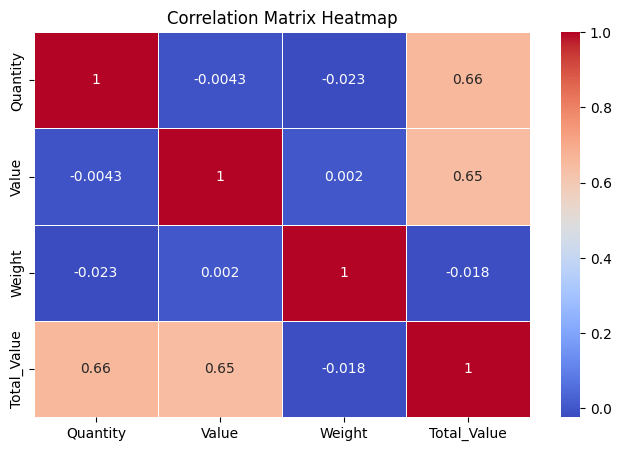

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Based on this correlation matrix, there are no significant linear causal relationships between the variables. The correlations are all very close to zero, which means that changes in one variable are not strongly associated with changes in another.

### Categorical (Based on Imports_Exports)

In [ ]:
# Categorical Data

def sd43_categorical_summary(df, cat_cols):
    summary = {}
    for col in cat_cols:
        if col in df.columns:
            summary[col] = {
                'Count': df[col].count(),
                'Frequency': df[col].value_counts().to_dict(),
                'Proportion': df[col].value_counts(normalize=True).to_dict(),
                'Minimum': df[col].min(),
                'Maximum': df[col].max(),
                'Mode': df[col].mode().iloc[0],
            }
    return summary

sd43_categorical_summaries = sd43_categorical_summary(sd43_sample, sd43_cat_vars)

for col, stats in sd43_categorical_summaries.items():
    print(f"Summary for {col}:")
    for stat_name, stat_value in stats.items():
        print(f"  {stat_name}: {stat_value}")
    print("-" * 20)  # separator

Summary for Country:
  Count: 5001
  Frequency: {'Congo': 47, 'Korea': 45, 'Pitcairn Islands': 32, 'Senegal': 30, 'Uzbekistan': 30, 'Denmark': 29, 'Burundi': 29, 'Ukraine': 29, 'Israel': 29, 'Saint Kitts and Nevis': 29, 'Kazakhstan': 28, 'Austria': 28, 'New Zealand': 28, 'Pakistan': 28, 'Dominica': 27, 'Heard Island and McDonald Islands': 27, "Cote d'Ivoire": 27, 'Iran': 27, 'Algeria': 27, 'Egypt': 27, 'Bolivia': 27, 'Gambia': 27, 'Mexico': 26, 'Dominican Republic': 26, 'Maldives': 26, 'Tanzania': 26, 'Bulgaria': 26, 'Anguilla': 26, 'Netherlands Antilles': 26, 'Wallis and Futuna': 26, 'British Indian Ocean Territory (Chagos Archipelago)': 26, 'Aruba': 26, 'Afghanistan': 25, 'Canada': 25, 'Djibouti': 25, 'Norway': 25, 'United Arab Emirates': 25, 'Switzerland': 25, 'Vanuatu': 25, 'Italy': 25, 'Sweden': 25, 'Saint Lucia': 25, 'Mayotte': 25, 'Moldova': 25, 'Bangladesh': 25, 'Palestinian Territory': 25, 'Gibraltar': 25, 'Timor-Leste': 25, 'Antigua and Barbuda': 25, 'Rwanda': 25, 'Japan': 25

### Data Visualisation

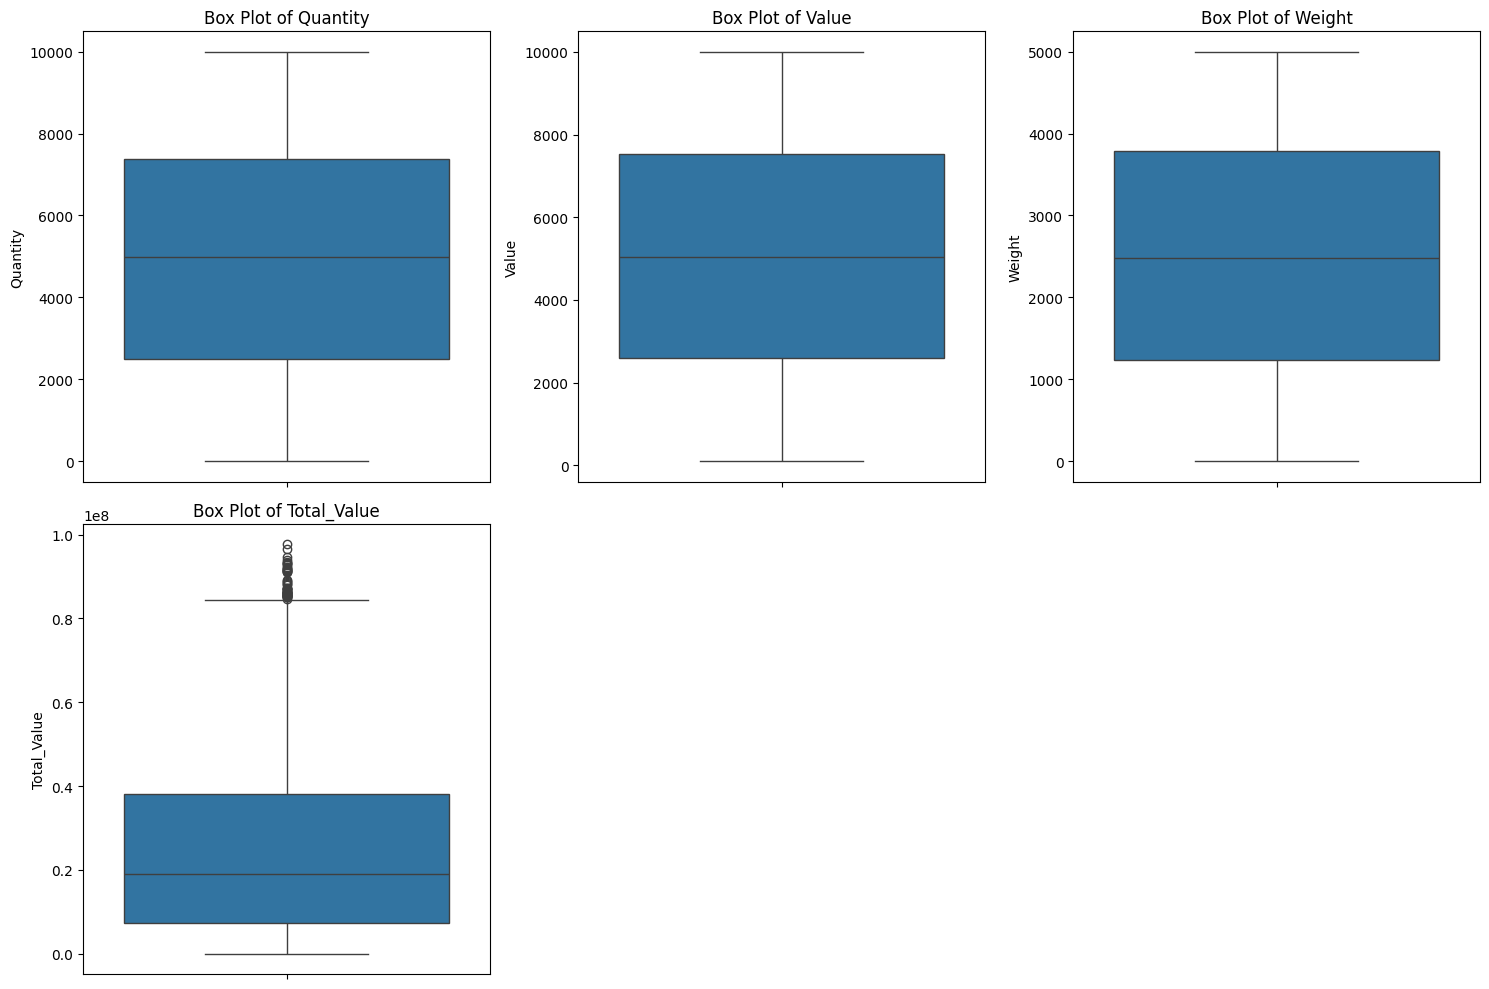

In [ ]:
# Box plots for non-categorical variables

plt.figure(figsize=(15, 10))
for i, col in enumerate(sd43_non_cat_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=sd43_sample[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

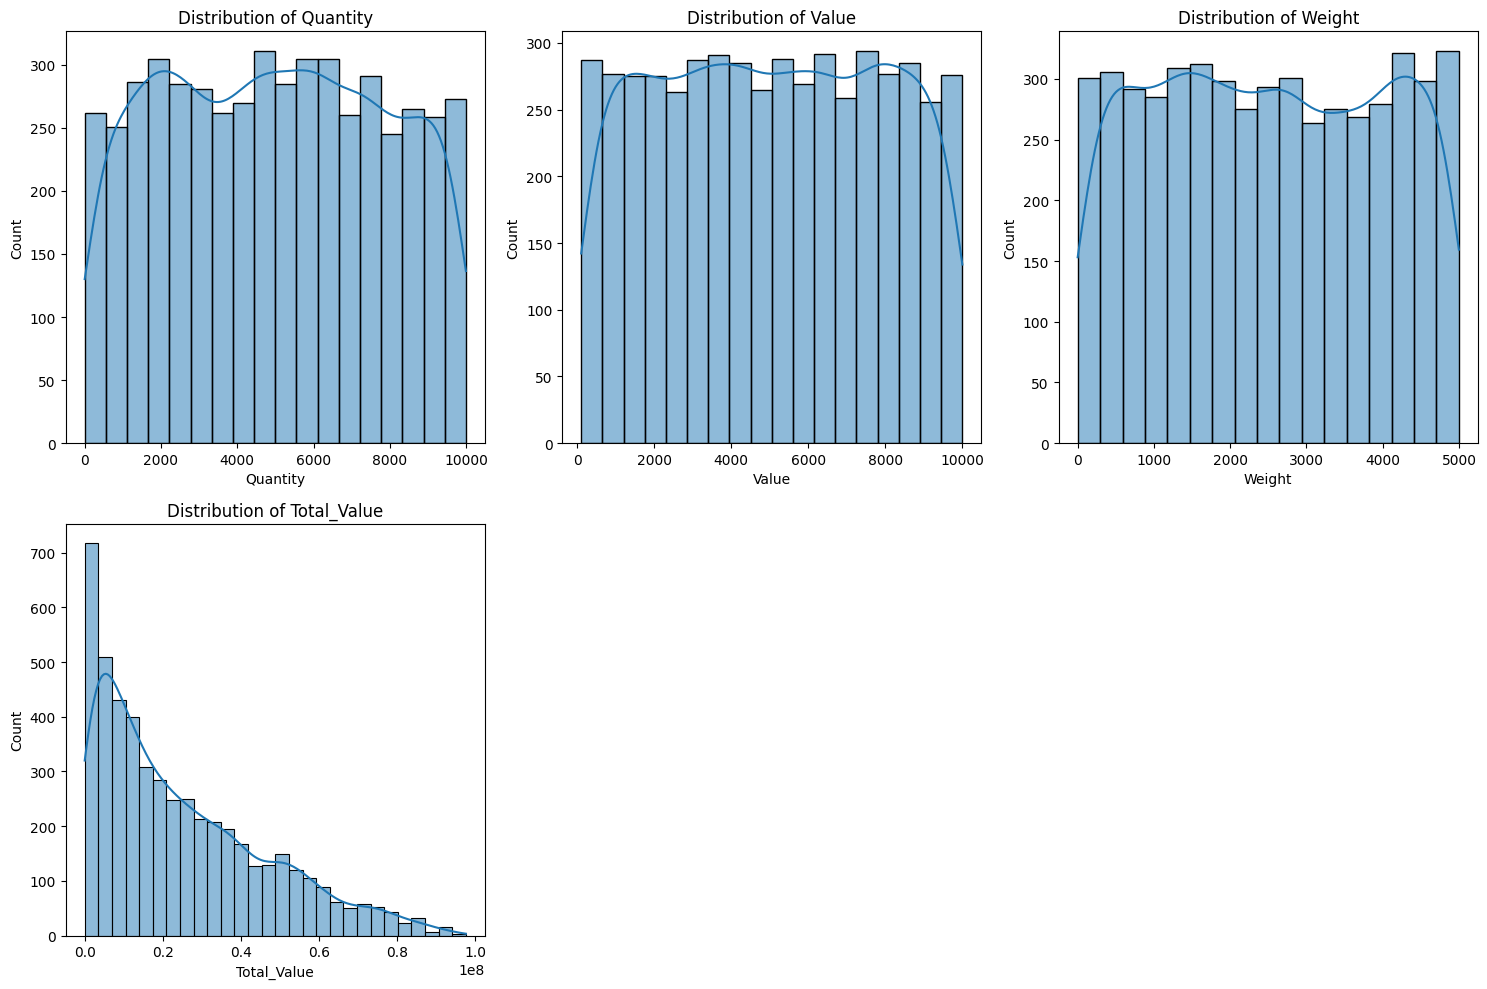

In [ ]:
# Histograms with KDE for distribution visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(sd43_non_cat_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(sd43_sample[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Inferential Statistics

In [ ]:
#Test of Homogeneity {Chi-sq} on categorical data

sd43_contingency_table = pd.crosstab(sd43_sample['Import_Export'], sd43_sample['Category'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(sd43_contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Interpret the results
sd43_alpha = 0.05  # Significance level

if p < sd43_alpha:
    print("Reject the null hypothesis: There is a significant association between the two categorical variables.")
else:
    print("There is no significant association between the two categorical variables.")

Chi-square statistic: 5.015580223592692
P-value: 0.2857025997012965
Degrees of freedom: 4
Expected frequencies:
[[508.28754249 499.79944011 510.78404319 508.78684263 469.34213157]
 [509.71245751 501.20055989 512.21595681 510.21315737 470.65786843]]
There is no significant association between the two categorical variables.


In [93]:
# Test of Normality {Shapiro-Wilk | Kolmogorov-Smirnov | Anderson-Darling | Jarque-Bera

def normality_tests(data):

    sd43_results = {}

    # Shapiro-Wilk test
    shapiro_statistic, shapiro_pvalue = shapiro(data)
    sd43_results["Shapiro-Wilk"] = {"statistic": shapiro_statistic, "p-value": shapiro_pvalue}

    # Kolmogorov-Smirnov test (against a normal distribution)
    ks_statistic, ks_pvalue = kstest(data, 'norm')
    sd43_results["Kolmogorov-Smirnov"] = {"statistic": ks_statistic, "p-value": ks_pvalue}

    # Anderson-Darling test
    anderson_result = anderson(data)
    sd43_results["Anderson-Darling"] = {
        "statistic": anderson_result.statistic,
        "critical_values": anderson_result.critical_values,
        "significance_level": anderson_result.significance_level
    }

    # Jarque-Bera test
    jb_statistic, jb_pvalue = jarque_bera(data)
    sd43_results["Jarque-Bera"] = {"statistic": jb_statistic, "p-value": jb_pvalue}

    return sd43_results

In [94]:
# Test of Co-relation (T-test)

def t_test_correlation(data1, data2):

  t_statistic, p_value = stats.ttest_ind(data1, data2)
  return {"t-statistic": t_statistic, "p-value": p_value}

for col in sd43_non_cat_vars:
  print(f"Normality tests for {col}:")
  normality_test_results = normality_tests(sd43_sample[col])
  for test_name, result in normality_test_results.items():
      print(f"  {test_name}: {result}")

  #Example of T-test
  if len(sd43_non_cat_vars) > 1:
    for i in range(len(sd43_non_cat_vars)):
        for j in range(i+1, len(sd43_non_cat_vars)):
            col1, col2 = sd43_non_cat_vars[i], sd43_non_cat_vars[j]
            t_test_result = t_test_correlation(sd43_sample[col1], sd43_sample[col2])
            print(f"T-test Correlation between {col1} and {col2}: {t_test_result}")
    print()
    print('*'*20)
    print()

Normality tests for Quantity:
  Shapiro-Wilk: {'statistic': 0.9584295750735309, 'p-value': 1.3715191109568363e-35}
  Kolmogorov-Smirnov: {'statistic': 0.5001189642444298, 'p-value': 0.0}
  Anderson-Darling: {'statistic': 49.534314825452384, 'critical_values': array([0.576, 0.655, 0.786, 0.917, 1.091]), 'significance_level': array([15. , 10. ,  5. ,  2.5,  1. ])}
  Jarque-Bera: {'statistic': 282.7978858197628, 'p-value': 3.90138982777881e-62}
T-test Correlation between Quantity and Value: {'t-statistic': -0.08856305855094612, 'p-value': 0.9294309411268195}
T-test Correlation between Quantity and Weight: {'t-statistic': -0.2632540619670526, 'p-value': 0.7923601881595559}
T-test Correlation between Quantity and Total_Value: {'t-statistic': 47.49125541654151, 'p-value': 0.0}
T-test Correlation between Value and Weight: {'t-statistic': -0.17432949370218245, 'p-value': 0.8616100504688806}
T-test Correlation between Value and Total_Value: {'t-statistic': 47.2284532244727, 'p-value': 0.0}
T-te

# Unsupervised Machine Learning

## Dimensity Reduction: Records

### K-Means Clustering

In [134]:
# Subset for cluster - Trade Flow

sd43_ds_subset = sd43_processed[['Import_Export','Total_Value']]
sd43_ds_subset

# Create K-Means Clusters
# ------------------------------------------

sd43_km_2cluster = kmclus(n_clusters=2, init='random', random_state=43)
sd43_km_2cluster_model = sd43_km_2cluster.fit_predict(sd43_ds_subset); sd43_km_2cluster_model

sd43_km_3cluster = kmclus(n_clusters=3, init='random', random_state=43)
sd43_km_3cluster_model = sd43_km_3cluster.fit_predict(sd43_ds_subset); sd43_km_3cluster_model

sd43_km_4cluster = kmclus(n_clusters=4, init='random', random_state=43)
sd43_km_4cluster_model = sd43_km_4cluster.fit_predict(sd43_ds_subset); sd43_km_4cluster_model

sd43_km_5cluster = kmclus(n_clusters=5, init='random', random_state=43)
sd43_km_5cluster_model = sd43_km_5cluster.fit_predict(sd43_ds_subset); sd43_km_5cluster_model

sd43_km_6cluster = kmclus(n_clusters=6, init='random', random_state=43)
sd43_km_6cluster_model = sd43_km_6cluster.fit_predict(sd43_ds_subset); sd43_km_6cluster_model

array([4, 4, 2, ..., 3, 4, 0], dtype=int32)

In [148]:
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore

# Function to tune DBSCAN hyperparameters
def tune_dbscan(data, eps_values, min_samples_values):
    results = []
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)

            # Ensure there are at least 2 clusters (excluding noise) to compute scores
            if len(set(labels)) > 1 and sum(labels == -1) < len(labels):
                try:
                    silhouette = sscore(data, labels)
                    davies_bouldin = dbscore(data, labels)
                except Exception as e:
                    # Handle cases where scores can't be computed
                    silhouette = None
                    davies_bouldin = None

                results.append({
                    "eps": eps,
                    "min_samples": min_samples,
                    "clusters": len(set(labels)) - (1 if -1 in labels else 0),
                    "noise_points": sum(labels == -1),
                    "silhouette_score": silhouette,
                    "davies_bouldin_score": davies_bouldin
                })
    # Return DataFrame only with valid results
    return pd.DataFrame(results)

# Example: Adjust ranges for eps and min_samples
eps_values = np.arange(0.1, 1.0, 0.1)  # Try values from 0.1 to 1.0
min_samples_values = range(2, 10)      # Try values from 2 to 10

# Run tuning function
sd43_dbscan_results = tune_dbscan(sd43_processed, eps_values, min_samples_values)


## BIRCH Clustering

In [131]:
sd43_birch2 = Birch(n_clusters=2)
sd43_birch2_labels = sd43_birch2.fit_predict(sd43_processed)

sd43_birch3 = Birch(n_clusters=3)
sd43_birch3_labels = sd43_birch3.fit_predict(sd43_processed)

sd43_birch4 = Birch(n_clusters=4)
sd43_birch4_labels = sd43_birch4.fit_predict(sd43_processed)

sd43_birch5 = Birch(n_clusters=5)
sd43_birch5_labels = sd43_birch5.fit_predict(sd43_processed)

sd43_birch6 = Birch(n_clusters=6)
sd43_birch6_labels = sd43_birch6.fit_predict(sd43_processed)

## Dimensity Reduction: Variables

### Principal Component Analysis


In [119]:
pca_records = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
sd43_pca_records = pca_records.fit_transform(sd43_processed)
sd43_pca_records

array([[  974.54036605,   681.11255238],
       [-1819.94849587, -1433.89056324],
       [-1518.85172101,   684.83456384],
       ...,
       [ 1279.24344537, -1582.88248684],
       [ -950.96948083,   569.31368102],
       [  348.98074467,  -923.42274118]])

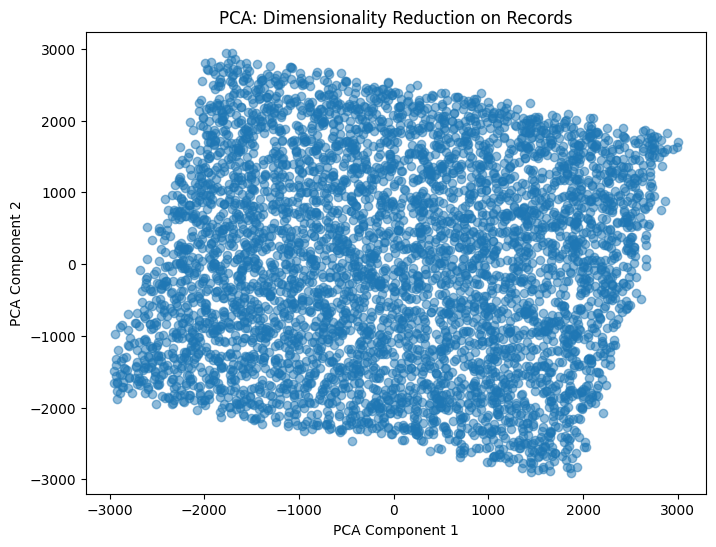

In [120]:
plt.figure(figsize=(8, 6))
plt.scatter(sd43_pca_records[:, 0], sd43_pca_records[:, 1], alpha=0.5)
plt.title("PCA: Dimensionality Reduction on Records")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Model Performance Metrics

## K-Means Clustering

In [115]:
# K-Means Clustering Model Evaluation [K=2 | K=3]

sd43_sscore_km_2cluster = sscore(sd43_ds_subset, sd43_km_2cluster_model); sd43_sscore_km_2cluster
sd43_dbscore_km_2cluster = dbscore(sd43_ds_subset, sd43_km_2cluster_model); sd43_dbscore_km_2cluster

sd43_sscore_km_3cluster = sscore(sd43_ds_subset, sd43_km_3cluster_model); sd43_sscore_km_3cluster
sd43_dbscore_km_3cluster = dbscore(sd43_ds_subset, sd43_km_3cluster_model); sd43_dbscore_km_3cluster

sd43_sscore_km_4cluster = sscore(sd43_ds_subset, sd43_km_4cluster_model); sd43_sscore_km_4cluster
sd43_dbscore_km_4cluster = dbscore(sd43_ds_subset, sd43_km_4cluster_model); sd43_dbscore_km_4cluster

sd43_sscore_km_5cluster = sscore(sd43_ds_subset, sd43_km_5cluster_model); sd43_sscore_km_5cluster
sd43_dbscore_km_5cluster = dbscore(sd43_ds_subset, sd43_km_5cluster_model); sd43_dbscore_km_5cluster

sd43_sscore_km_6cluster = sscore(sd43_ds_subset, sd43_km_6cluster_model); sd43_sscore_km_6cluster
sd43_dbscore_km_6cluster = dbscore(sd43_ds_subset, sd43_km_6cluster_model); sd43_dbscore_km_6cluster


sd43_sscores = [sd43_sscore_km_2cluster,sd43_sscore_km_3cluster,sd43_sscore_km_4cluster,sd43_sscore_km_5cluster,sd43_sscore_km_6cluster]
sd43_sscores


[0.7713237212229548,
 0.7066102491399199,
 0.6477401582777688,
 0.630253857198134,
 0.6084953244870699]

### Clustering Analysis:

Optimal Number of Clusters:

- Based on the scores, K=2 is the optimal choice if the goal is to maximize cohesion and separation.
- However, if K=3 aligns better with your business context or provides more meaningful segmentation, it is also a viable choice.
Quality of Clusters:

- A Silhouette Score of ~0.7 for K=3 indicates that the clusters are still reasonably well-separated and cohesive, though not as strong as with K=2.
For K=4 to K=6, the scores drop below 0.65, suggesting less well-defined clusters and possible overlap between them.

In [113]:
sd43_dbscores = [sd43_dbscore_km_2cluster,sd43_dbscore_km_3cluster,sd43_dbscore_km_4cluster,sd43_dbscore_km_5cluster,sd43_dbscore_km_6cluster]
sd43_dbscores

[1.8718552886427808,
 1.5957119591551914,
 1.5615629060745135,
 1.4657575592170466,
 1.3753058015538235]

### DB Scores:

- Clustering Quality:
  - The DB Scores confirm that K=2 provides the best clustering, with the most compact and distinct clusters.
  - While K=3 has a slightly higher DB Score (0.4353), it could still be considered if more segmentation is needed.
- Decreasing Cluster Quality for Higher K:

  - For K=4, K=5, and K=6, the DB Scores remain above 0.5, indicating that the clusters become less distinct and more dispersed.
  - This suggests that increasing the number of clusters beyond K=3 results in diminishing returns.

## DBSCAN

In [149]:
# Display valid results sorted by silhouette score
if "silhouette_score" in sd43_dbscan_results.columns:
    print(sd43_dbscan_results.sort_values(by="silhouette_score", ascending=False).head(10))
else:
    print("No valid clusters with silhouette_score were generated.")

No valid clusters with silhouette_score were generated.


In [153]:
# prompt: get sscore and dbscore for all clusters in birch clustering

from sklearn.metrics import silhouette_score as sscore
from sklearn.metrics import davies_bouldin_score as dbscore

# Calculate and print sscore and dbscore for Birch clusters
print("BIRCH Clustering Scores:")
print()
for i in range(2, 7):
    birch_model = eval(f"sd43_birch{i}")
    birch_labels = eval(f"sd43_birch{i}_labels")
    try:
        s = sscore(sd43_processed, birch_labels)
        db = dbscore(sd43_processed, birch_labels)
        print(f"n_clusters={i}: Silhouette Score = {s:.4f}, Davies-Bouldin Score = {db:.4f}")
        print()
    except ValueError:
        print(f"n_clusters={i}: Could not compute scores (likely only one cluster)")

BIRCH Clustering Scores:

n_clusters=2: Silhouette Score = 0.1668, Davies-Bouldin Score = 2.0497

n_clusters=3: Silhouette Score = 0.1312, Davies-Bouldin Score = 1.8711

n_clusters=4: Silhouette Score = 0.1072, Davies-Bouldin Score = 1.7091

n_clusters=5: Silhouette Score = 0.1078, Davies-Bouldin Score = 1.6083

n_clusters=6: Silhouette Score = 0.1183, Davies-Bouldin Score = 1.7036



## Model Run Statistics

### Time Taken

In [155]:
import time

def time_model_run(model, data):
    start_time = time.time()
    model.fit(data)  # or model.fit_predict(data) depending on the model
    end_time = time.time()
    return end_time - start_time


# Example usage for KMeans (adapt for other models):
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, init='random', random_state=43) #Example
kmeans_time = time_model_run(kmeans_model, sd43_ds_subset)
print(f"KMeans runtime: {kmeans_time:.4f} seconds")

# Example usage for DBSCAN
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5) #Example
dbscan_time = time_model_run(dbscan_model, sd43_processed)
print(f"DBSCAN runtime: {dbscan_time:.4f} seconds")

#Example usage for Birch
from sklearn.cluster import Birch
birch_model = Birch(n_clusters=2) #Example
birch_time = time_model_run(birch_model, sd43_processed)
print(f"Birch runtime: {birch_time:.4f} seconds")

KMeans runtime: 0.0173 seconds
DBSCAN runtime: 0.0670 seconds
Birch runtime: 1.8115 seconds


### Memory Utilised

In [160]:
import tracemalloc

def get_model_memory_usage(model, data):
    tracemalloc.start()
    model.fit(data)  # or model.fit_predict(data) depending on the model
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak / (1024 * 1024)  # Convert bytes to MB


# Example usage for KMeans
kmeans_model = KMeans(n_clusters=2, init='random', random_state=43)
kmeans_memory = get_model_memory_usage(kmeans_model, sd43_ds_subset)
print(f"KMeans memory usage: {kmeans_memory:.2f} MB")

# Example usage for DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
dbscan_memory = get_model_memory_usage(dbscan_model, sd43_processed)
print(f"DBSCAN memory usage: {dbscan_memory:.2f} MB")

# Example usage for Birch
birch_model = Birch(n_clusters=2)
birch_memory = get_model_memory_usage(birch_model, sd43_processed)
print(f"Birch memory usage: {birch_memory:.2f} MB")

KMeans memory usage: 0.34 MB
DBSCAN memory usage: 2.44 MB
Birch memory usage: 292.00 MB


Based on above stats, we will choose K-Means Clustering model with K=2

--- End of Project ---